In [1]:
import os
import glob
import sys

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
base_path = '../experiments/'
model = 'resnet18'

METHODS = {
#     "ig": "ig",
    "sailency": "sailency",
    "gradcam": "gradcam",
    "deconv": "deconv",
    "gbp": "gbp",
}

SPLIT_OPTIONS = ["100%", "80%", "60%", "40%", "20%"]

DATASETS = {
    "edible-plants": "edible-plants",
    "food101": "food101",
    "marvel": "marvel",
    "plant-data": "plant-data",
    "stanford-dogs": "stanford-dogs",
}
ACC = {}
F1 = {}

fig_size = (30,16)
title_font=32
label_font=28
marker_size=18

plt.rcParams.update({'font.size': 22})

In [3]:
for dataset in DATASETS.keys():
    for data_split in SPLIT_OPTIONS:
        path = os.path.join('../models/evals', f"{model}-{dataset}-{data_split}.csv")
        res_df = pd.read_csv(path, names=['f1', 'acc'])        
        
        if dataset not in ACC:
            ACC[dataset] = {}
        if dataset not in F1:
            F1[dataset] = {}
        
        ACC[dataset][data_split] = float(res_df['acc'])
        F1[dataset][data_split] = float(res_df['f1'])

In [4]:
scores = []
for dataset in DATASETS.keys():
    for method in METHODS.keys():
        for data_split in SPLIT_OPTIONS:
            path = os.path.join(base_path, dataset, f"{model}-{data_split}", method, f"{model}-{dataset}-{method}.csv")
            df = pd.read_csv(path)
            df = df.mean(axis=0)
            scores.append([model, dataset, data_split, method, ACC[dataset][data_split], F1[dataset][data_split], df['# infidelity'], df['sensitivity']])
       

In [5]:
scores_df = pd.DataFrame(np.array(scores), columns=['model', 'dataset', 'data_split', 'method', 'acc', 'f1', 'infidelity', 'sensitivity'])
scores_df['acc'] = scores_df['acc'].map(lambda x: float(x))
scores_df['f1'] = scores_df['f1'].map(lambda x: float(x))

In [6]:
scores_df[scores_df['method'] == 'gbp']

,model,dataset,data_split,method,acc,f1,infidelity,sensitivity
15,resnet18,edible-plants,100%,gbp,0.8146,0.7671,0.0003168228684385653,1.094964035095707
16,resnet18,edible-plants,80%,gbp,0.7867,0.7348,0.00025115353234850187,1.0983775794506072
17,resnet18,edible-plants,60%,gbp,0.7709,0.7168,0.00023192033975999126,1.0779291197176903
18,resnet18,edible-plants,40%,gbp,0.7411,0.6634,0.00019475604838061695,1.104961335274481
19,resnet18,edible-plants,20%,gbp,0.5519,0.4914,0.0001428275199795016,1.0698755991074347
35,resnet18,food101,100%,gbp,0.7650,0.7632,0.0016041342091287307,1.2456006151142687
36,resnet18,food101,80%,gbp,0.7550,0.7532,0.001588573731866142,1.2323896683206652
37,resnet18,food101,60%,gbp,0.7362,0.7326,0.0015303167084789269,1.2222081565384817
38,resnet18,food101,40%,gbp,0.7146,0.7122,0.0013759107281636023,1.2515793076718207
39,resnet18,food101,20%,gbp,0.6741,0.6689,0.001000692365343981,1.2131975326915778


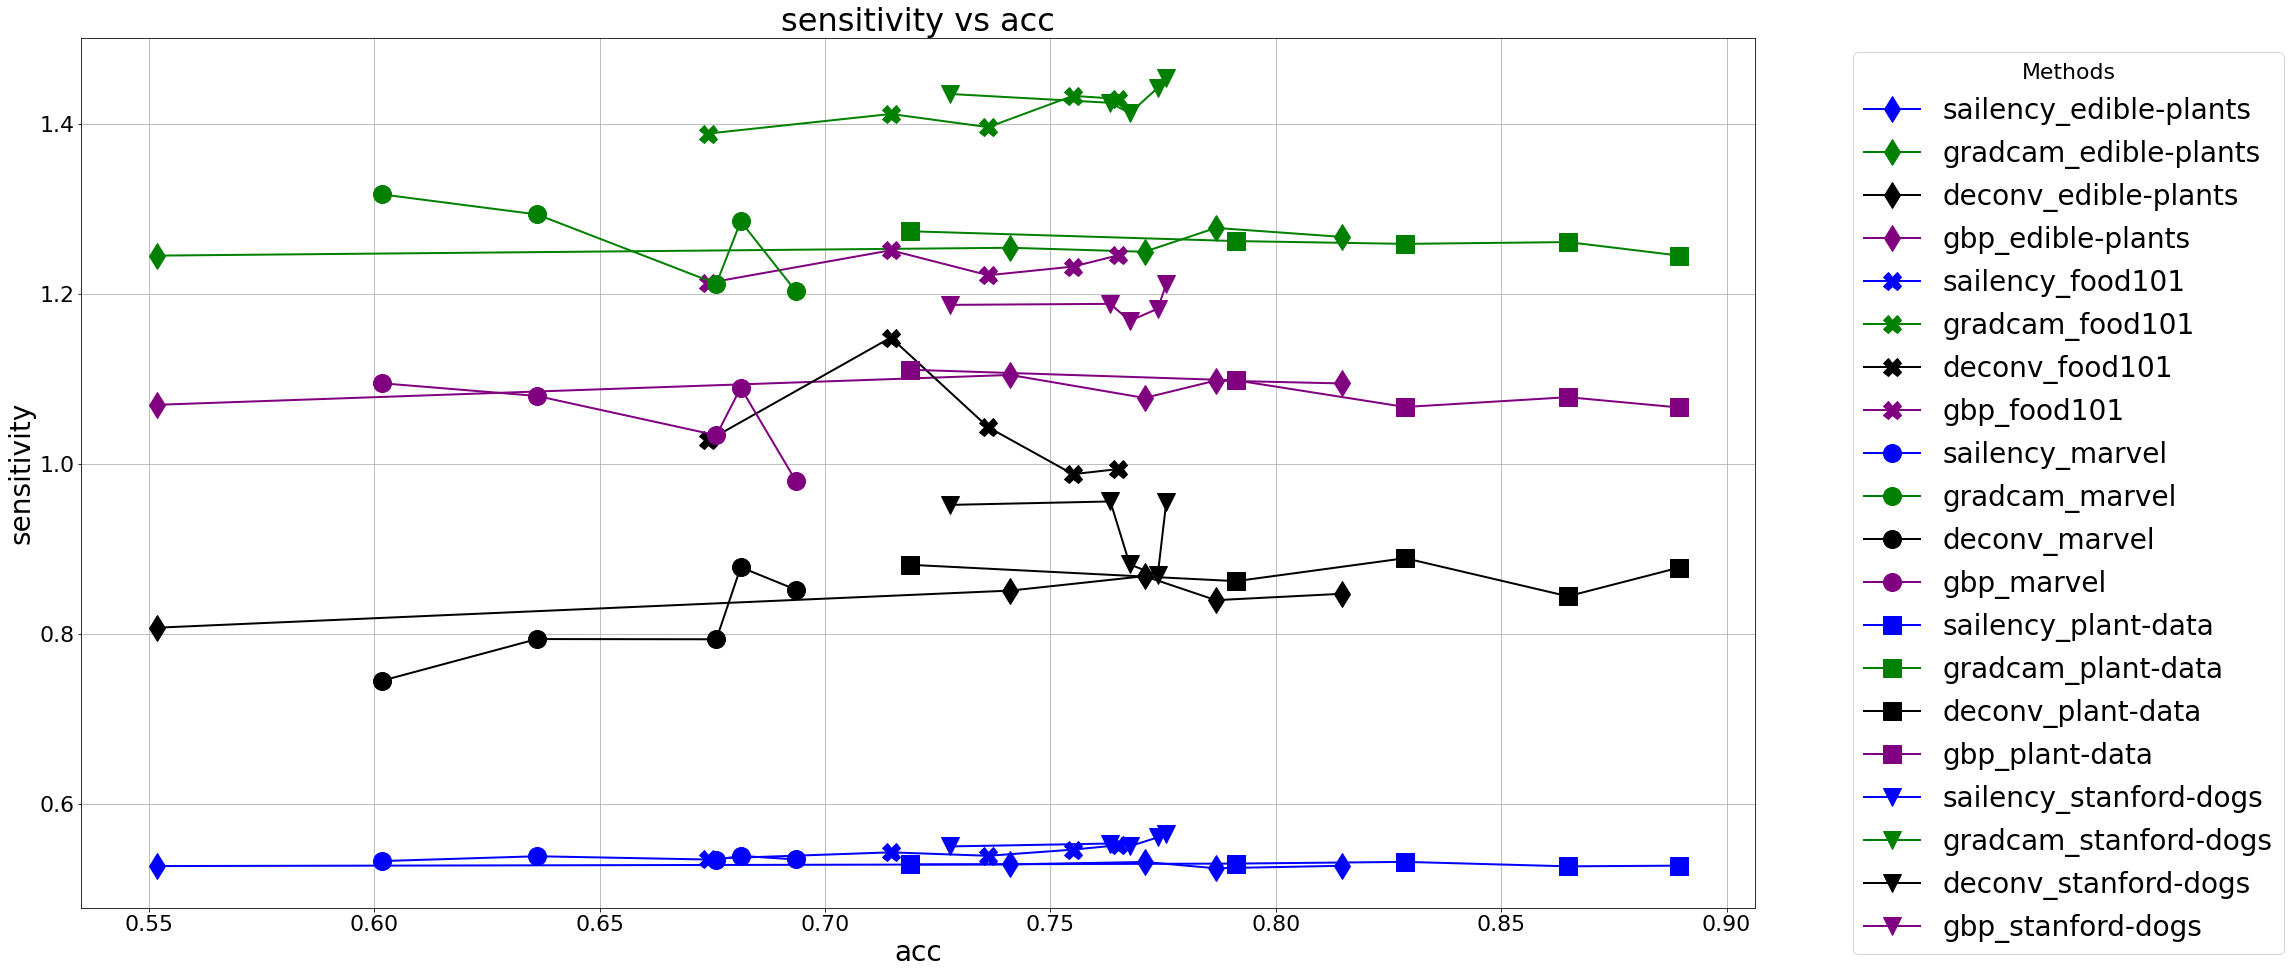

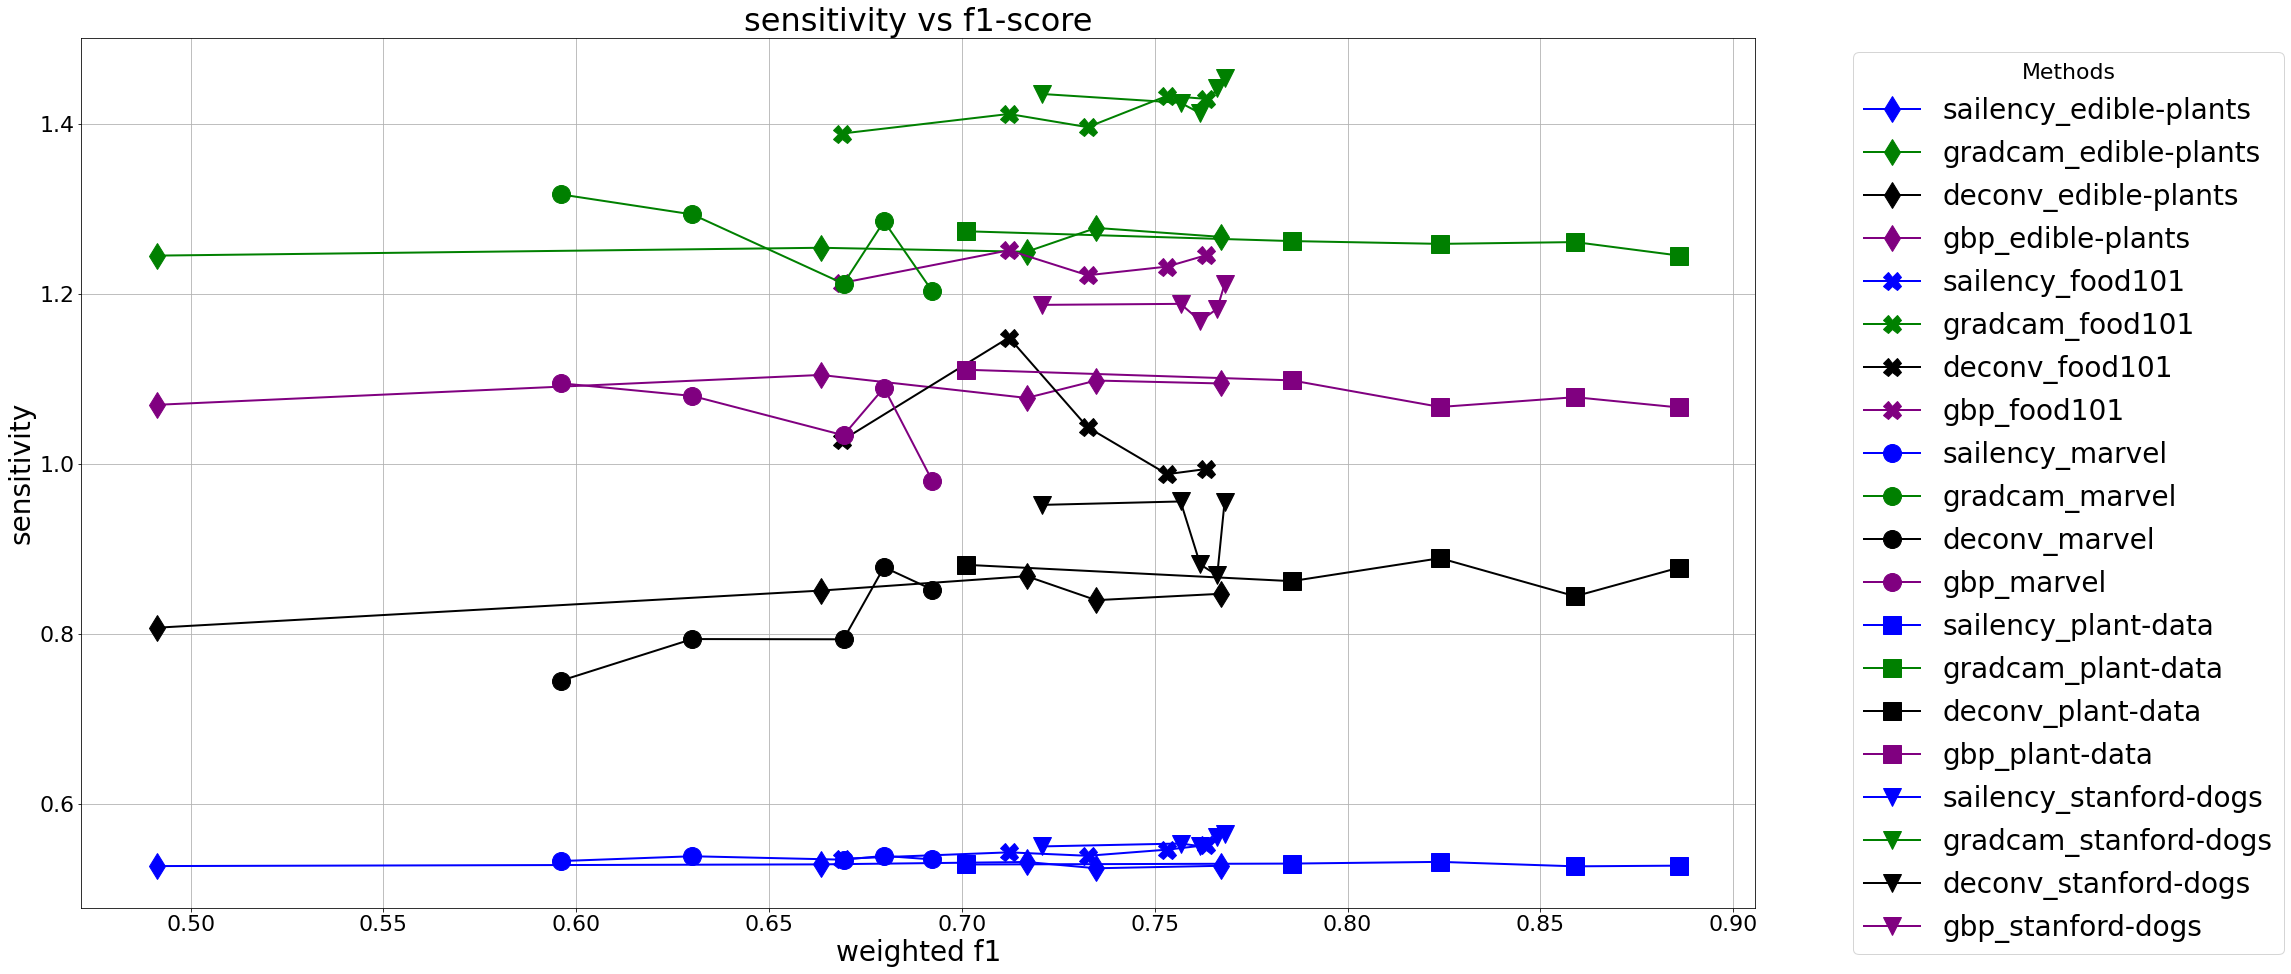

In [7]:
COLORS = {
#     "ig": "red",
    "sailency": "blue",
    "gradcam": "green",
    "deconv": "black",
    "gbp": "purple",
}
MARKERS = {
    "edible-plants": "d",
    "food101": "X",
    "marvel": "o",
    "plant-data": "s",
    "stanford-dogs": "v",
}
plt.figure(figsize=fig_size) 

for dataset in DATASETS.keys():
    for method in METHODS.keys():
        filter_df = scores_df[(scores_df['method'] == method) & (scores_df['dataset'] == dataset)].sort_values(['acc'])
        filter_df['sensitivity'] = filter_df['sensitivity'].map(lambda x: float(x))

        plt.plot(filter_df['acc'], filter_df['sensitivity'], color=COLORS[method], marker=MARKERS[dataset], label=method+'_'+dataset, linewidth=2, markersize=marker_size)
    
plt.title('sensitivity vs acc', fontsize=title_font)
plt.xlabel('acc', fontsize=label_font)
plt.ylabel('sensitivity', fontsize=label_font)
plt.legend( title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_font)
plt.grid(True)
plt.show()

plt.figure(figsize=fig_size) 

for dataset in DATASETS.keys():
    for method in METHODS.keys():
        filter_df = scores_df[(scores_df['method'] == method) & (scores_df['dataset'] == dataset)].sort_values(['f1'])
        filter_df['sensitivity'] = filter_df['sensitivity'].map(lambda x: float(x))

        plt.plot(filter_df['f1'], filter_df['sensitivity'], color=COLORS[method], marker=MARKERS[dataset], label=method+'_'+dataset, linewidth=2, markersize=marker_size)
    
plt.title('sensitivity vs f1-score', fontsize=title_font)
plt.xlabel('weighted f1', fontsize=label_font)
plt.ylabel('sensitivity', fontsize=label_font)
plt.legend( title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_font)
plt.grid(True)
plt.show()

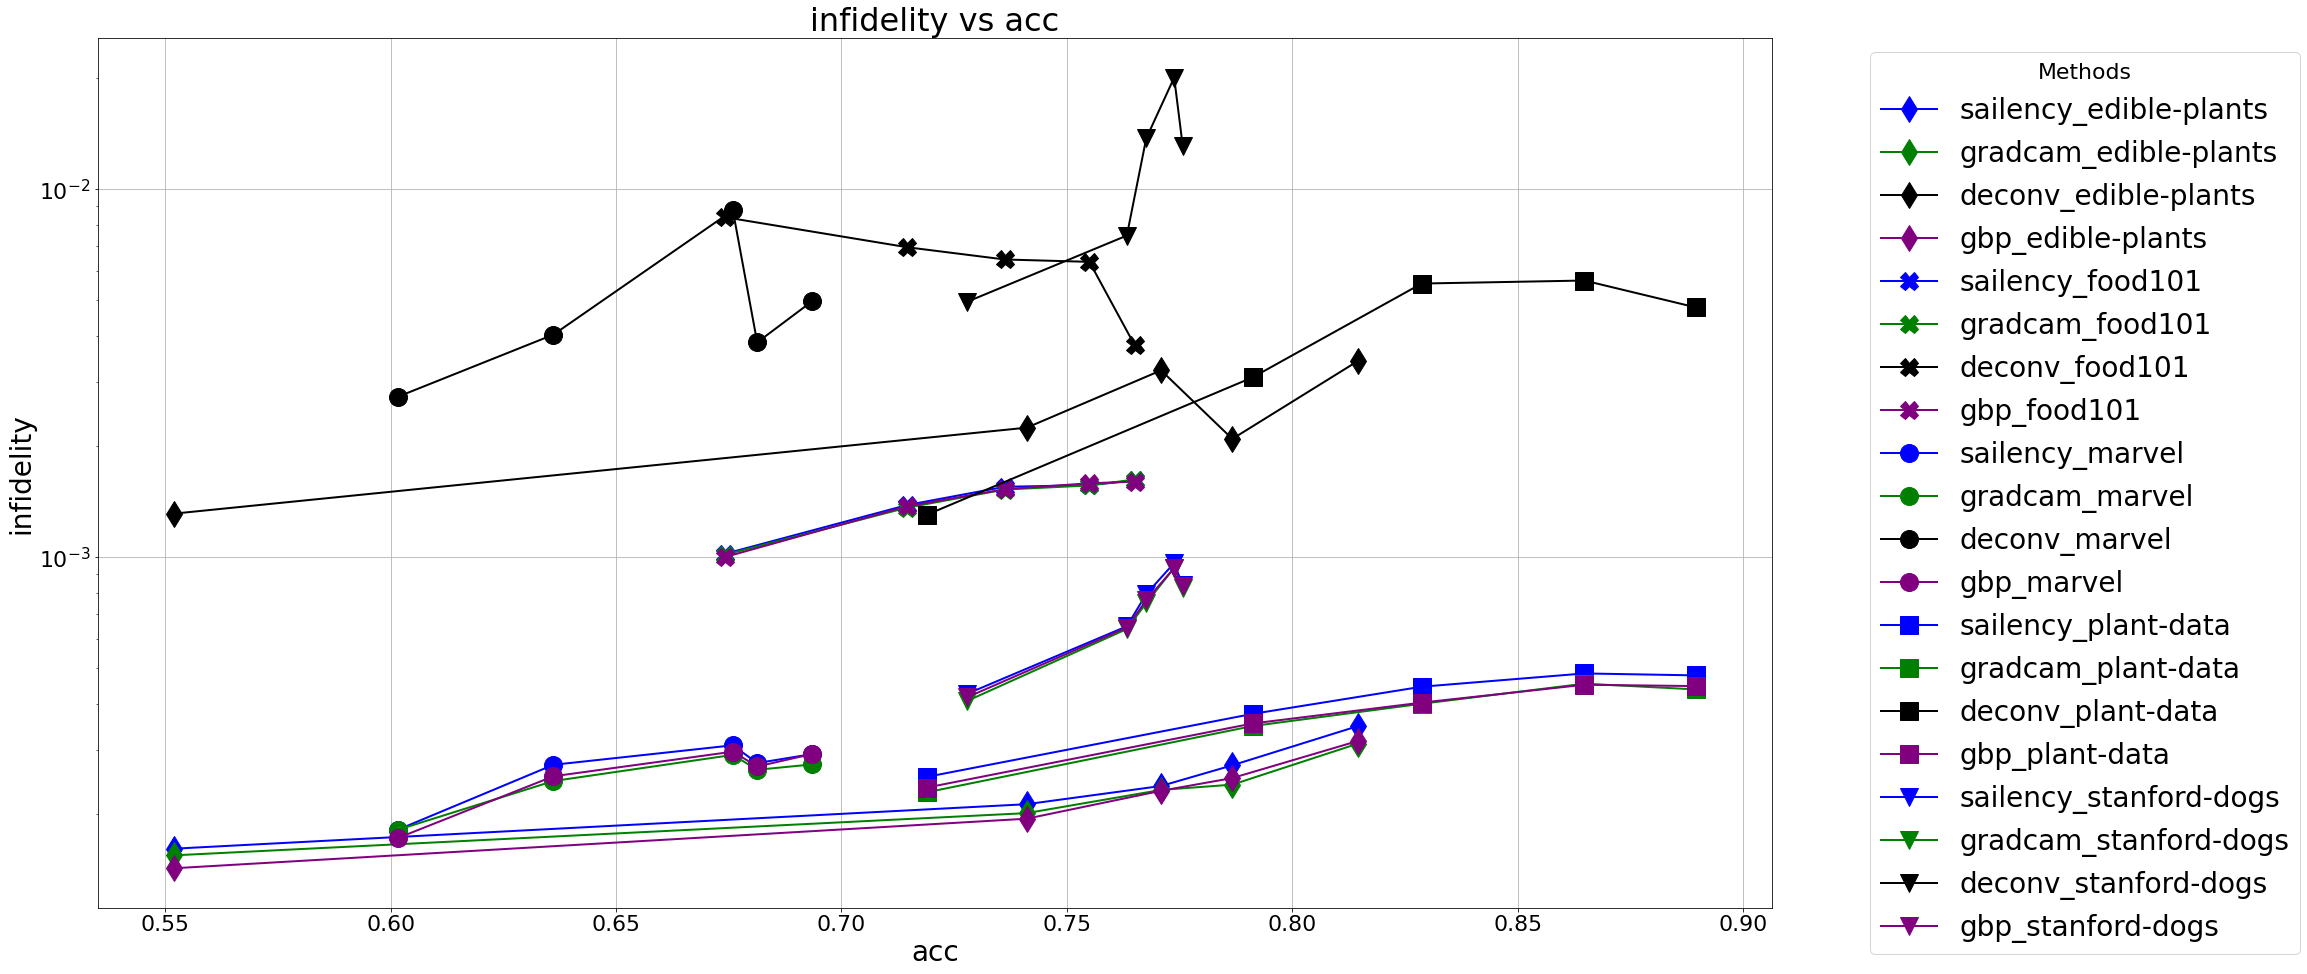

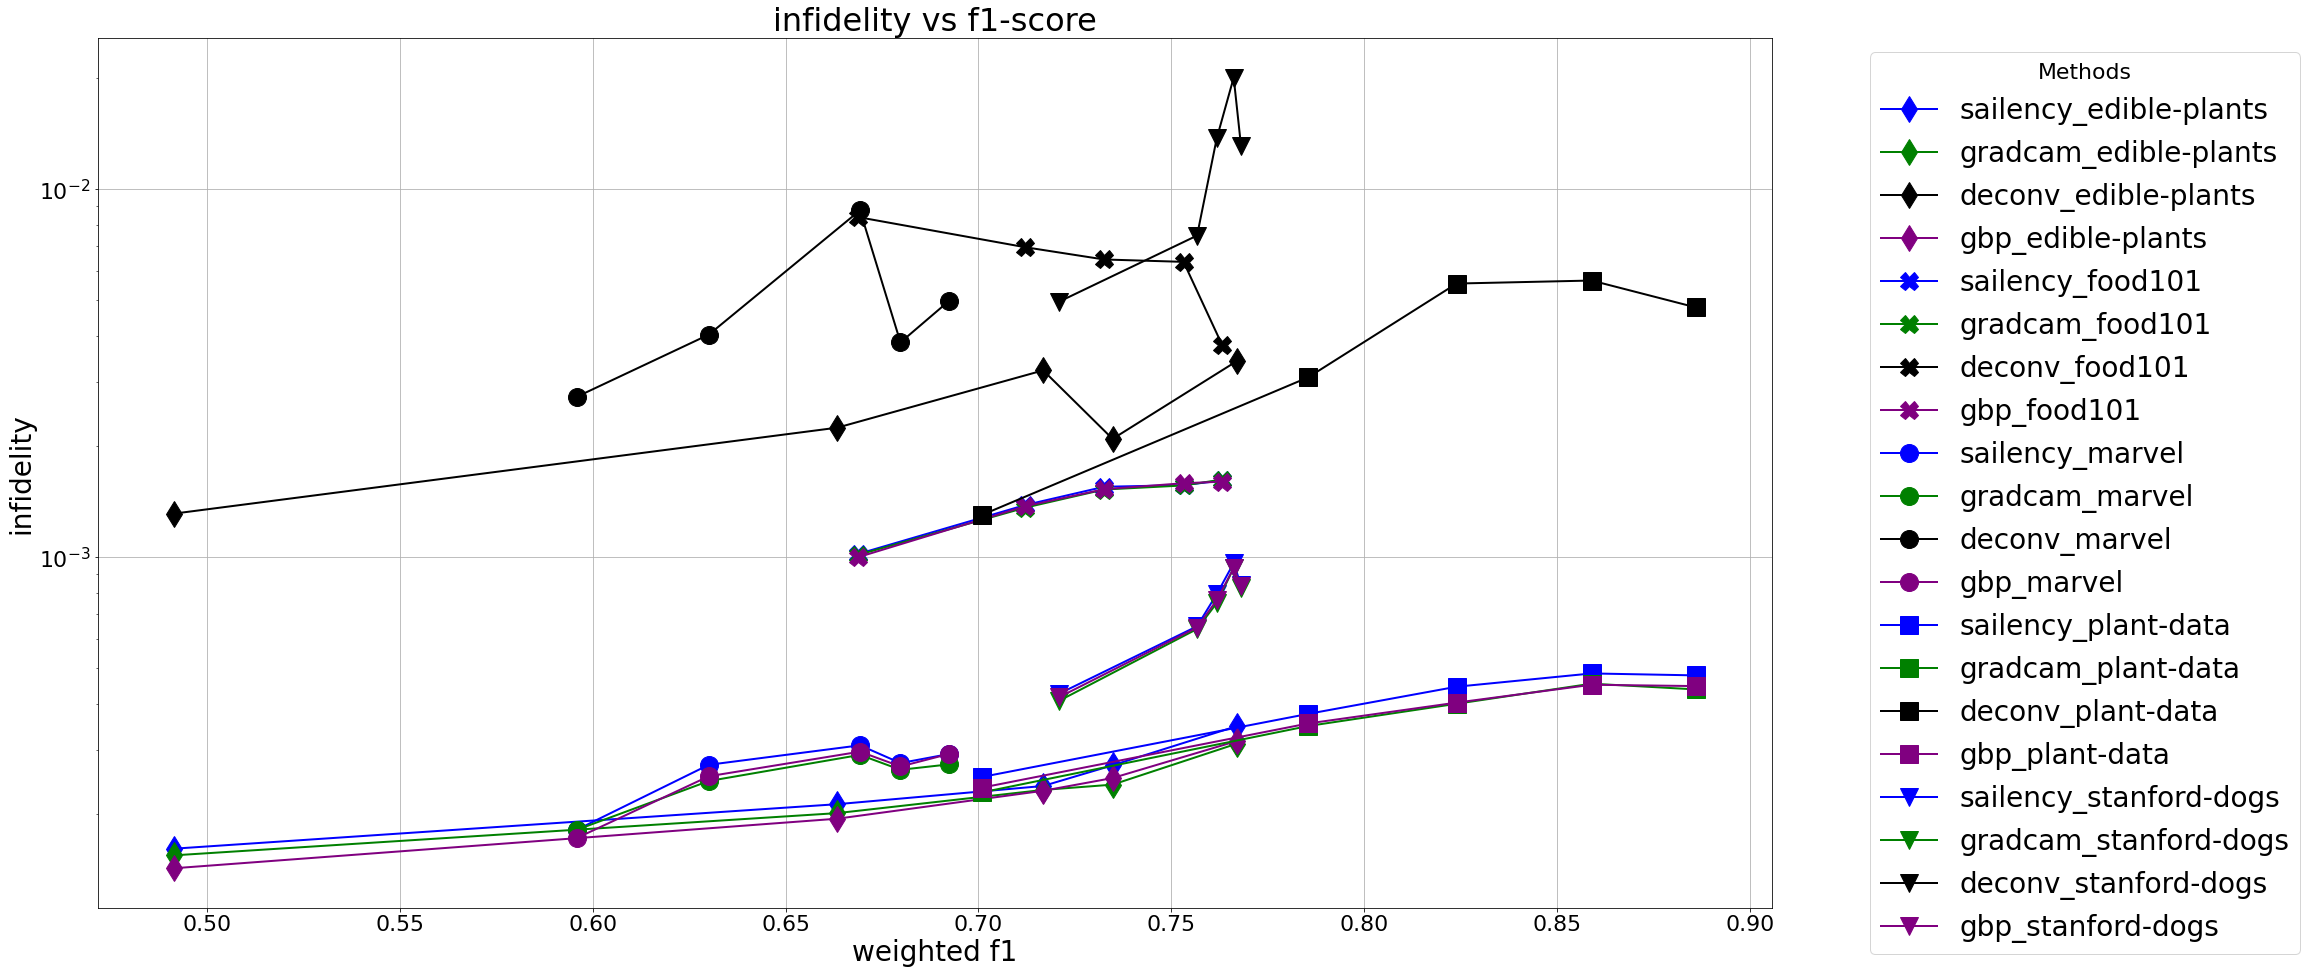

In [8]:

plt.figure(figsize=fig_size) 
for dataset in DATASETS.keys():
    for method in METHODS.keys():
        filter_df = scores_df[(scores_df['method'] == method) & (scores_df['dataset'] == dataset)].sort_values(['acc'])
        filter_df['infidelity'] = filter_df['infidelity'].map(lambda x: float(x))

        plt.plot(filter_df['acc'], filter_df['infidelity'], color=COLORS[method], marker=MARKERS[dataset], label=method+'_'+dataset, linewidth=2, markersize=marker_size)
    
plt.title('infidelity vs acc', fontsize=title_font)
plt.xlabel('acc', fontsize=label_font)
plt.ylabel('infidelity', fontsize=label_font)
plt.yscale('log')
plt.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_font)
plt.grid(True)
plt.show()

plt.figure(figsize=fig_size) 
for dataset in DATASETS.keys():
    for method in METHODS.keys():
        filter_df = scores_df[(scores_df['method'] == method) & (scores_df['dataset'] == dataset)].sort_values(['f1'])
        filter_df['infidelity'] = filter_df['infidelity'].map(lambda x: float(x))

        plt.plot(filter_df['f1'], filter_df['infidelity'], color=COLORS[method], marker=MARKERS[dataset], label=method+'_'+dataset, linewidth=2, markersize=marker_size)
    
plt.title('infidelity vs f1-score', fontsize=title_font)
plt.xlabel('weighted f1', fontsize=label_font)
plt.ylabel('infidelity', fontsize=label_font)
plt.yscale('log')
plt.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_font)
plt.grid(True)
plt.show()